In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time
import pickle
import os


pickle_in=open('X.pickle','rb')
X=pickle.load(pickle_in)
pickle_in_1=open('y.pickle','rb')
y=pickle.load(pickle_in_1)

X = X/255.0
dense_layers=[2]
layer_sizes=[64]
conv2D_layers=[4]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv2D_layers:
            NAME='{}-dense-{}-layers-{}-conv'.format(dense_layer,layer_size,conv_layer)
            tensorBoard = TensorBoard(log_dir="logs/{}".format(NAME))
            print(NAME)

            model = Sequential()
            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))
            
            for i in range(conv_layer-1):


                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())    

            for i in range(dense_layer):
 
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(4))
            model.add(Activation('sigmoid'))

            model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

            r=model.fit(X, y, batch_size=20, epochs=8, validation_split=0.2, callbacks=[tensorBoard])
            model.save('final_model.h5')

2-dense-64-layers-4-conv
Epoch 1/8
71/71 [==============================] - 39s 538ms/step - loss: 1.3337 - accuracy: 0.2942 - val_loss: 0.9817 - val_accuracy: 0.5751
Epoch 2/8
71/71 [==============================] - 35s 497ms/step - loss: 0.8788 - accuracy: 0.6170 - val_loss: 0.6580 - val_accuracy: 0.7394
Epoch 3/8
71/71 [==============================] - 37s 520ms/step - loss: 0.6525 - accuracy: 0.7093 - val_loss: 0.5198 - val_accuracy: 0.7847
Epoch 4/8
71/71 [==============================] - 35s 490ms/step - loss: 0.4820 - accuracy: 0.8158 - val_loss: 0.4633 - val_accuracy: 0.8045
Epoch 5/8
71/71 [==============================] - 35s 492ms/step - loss: 0.3921 - accuracy: 0.8476 - val_loss: 0.3915 - val_accuracy: 0.8555
Epoch 6/8
71/71 [==============================] - 38s 535ms/step - loss: 0.3527 - accuracy: 0.8709 - val_loss: 0.4949 - val_accuracy: 0.8442
Epoch 7/8
71/71 [==============================] - 36s 507ms/step - loss: 0.2663 - accuracy: 0.9064 - val_loss: 0.4886 - va

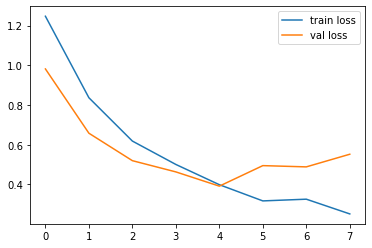

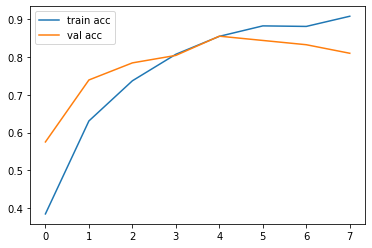

<Figure size 432x288 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [3]:
print(len(X),len(y))

1761 1761


6/6 [==============================] - 1s 107ms/step - loss: 0.3017 - accuracy: 0.8870


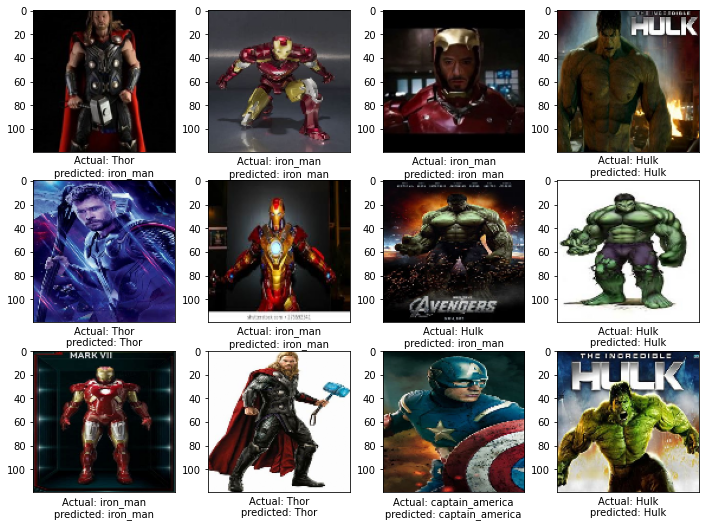

In [12]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

categories =['iron_man','Hulk','captain_america','Thor']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1)

model=tf.keras.models.load_model('final_model.h5')
model.evaluate(X_test,y_test, verbose=1)

prediction= model.predict(X_test)

plt.figure(figsize=(12,12))

for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[i])
    plt.xlabel('Actual: '+ categories[y_test[i]]+ '\n' + 'predicted: '+ categories[np.argmax(prediction[i])])
    plt.xticks([])
    
plt.show()